In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/AI Bootcamp/EDA/2C-Pandas & SQL

[Errno 2] No such file or directory: '/content/drive/MyDrive/AI Bootcamp/EDA/2C-Pandas & SQL'
/content


In [ ]:
!pip install pandas===2.0.3
!pip install pandasql===0.7.3

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26771 sha256=801f3f813e891d5d7e3834196902e474523d31e7f1710ddef084f1b5115c36e5
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql


In [ ]:
from pandasql import sqldf
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd

ModuleNotFoundError: No module named 'pandasql'

Reading the 311 complaints CSV file using Pandas

The dataframe should have around 7000 rows and 11 columns

In [ ]:
df = pd.read_csv('NYC 311.csv')

In [ ]:
len(df)

179474

In [ ]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Segment,Latitude,Longitude,Location,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts,Police Precinct
0,60646474,03/22/2024 01:36:24 AM,NaN,NYPD,New York City Police Department,Noise - Residential,Loud Talking,Residential Building/House,10029.0,124 EAST 103 STREET,...,NaN,40.790603,-73.948390,"(40.79060270525623, -73.94839005197896)",12426.0,7.0,4.0,35.0,14.0,14.0
1,60645357,03/22/2024 01:36:01 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Parking Permit Improper Use,Street/Sidewalk,10001.0,518 WEST 27 STREET,...,NaN,40.750662,-74.003432,"(40.75066178373737, -74.00343234416158)",11722.0,12.0,4.0,10.0,6.0,6.0
2,60645292,03/22/2024 01:35:26 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11223.0,1838 WEST 7 STREET,...,NaN,40.602409,-73.979657,"(40.60240932285499, -73.97965693117018)",18183.0,1.0,2.0,45.0,37.0,37.0
3,60653812,03/22/2024 01:35:11 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11218.0,506 EAST 3 STREET,...,NaN,40.639466,-73.976673,"(40.63946618752826, -73.97667301006392)",17620.0,2.0,2.0,27.0,39.0,39.0
4,60645256,03/22/2024 01:34:32 AM,NaN,NYPD,New York City Police Department,Animal-Abuse,Tortured,Residential Building/House,10453.0,1750 GRAND AVENUE,...,NaN,40.849341,-73.913428,"(40.849340697752865, -73.91342792378171)",10931.0,6.0,5.0,29.0,29.0,29.0


Preprocessing the dataset

In [ ]:
#Preprocessing the dataframe by adding extra columns
#The extra columns are: year,month,hour,weekday, and Closing period
# making separate Date columns, date, time, and time flag (AM,PM) from "CreatedDate" column
df["Created Date"] = df["Created Date"].astype(str)
CreatedDate_new = df["Created Date"].str.split(" ", expand = True)
#Extract the date as a column
df["Created Date"]= CreatedDate_new[0]

In [ ]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Segment,Latitude,Longitude,Location,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts,Police Precinct
0,60646474,03/22/2024,NaN,NYPD,New York City Police Department,Noise - Residential,Loud Talking,Residential Building/House,10029.0,124 EAST 103 STREET,...,NaN,40.790603,-73.948390,"(40.79060270525623, -73.94839005197896)",12426.0,7.0,4.0,35.0,14.0,14.0
1,60645357,03/22/2024,NaN,NYPD,New York City Police Department,Illegal Parking,Parking Permit Improper Use,Street/Sidewalk,10001.0,518 WEST 27 STREET,...,NaN,40.750662,-74.003432,"(40.75066178373737, -74.00343234416158)",11722.0,12.0,4.0,10.0,6.0,6.0
2,60645292,03/22/2024,NaN,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11223.0,1838 WEST 7 STREET,...,NaN,40.602409,-73.979657,"(40.60240932285499, -73.97965693117018)",18183.0,1.0,2.0,45.0,37.0,37.0
3,60653812,03/22/2024,NaN,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11218.0,506 EAST 3 STREET,...,NaN,40.639466,-73.976673,"(40.63946618752826, -73.97667301006392)",17620.0,2.0,2.0,27.0,39.0,39.0
4,60645256,03/22/2024,NaN,NYPD,New York City Police Department,Animal-Abuse,Tortured,Residential Building/House,10453.0,1750 GRAND AVENUE,...,NaN,40.849341,-73.913428,"(40.849340697752865, -73.91342792378171)",10931.0,6.0,5.0,29.0,29.0,29.0


In [ ]:
#Extract the Day,Year, and Month of the complaint from the "Created_Date" column
Created_Date_new = df["Created Date"].str.split("/", expand = True)
print(Created_Date_new.head())
#Extract the month as a column
df["Created_Month"] = Created_Date_new[0]
#Extract the day as a column
df["Created_Day"] = Created_Date_new[1]
#Extract the year as a column
df["Created_Year"] = Created_Date_new[2]
#Extract the Weekday of the complaint

    0   1     2
0  03  22  2024
1  03  22  2024
2  03  22  2024
3  03  22  2024
4  03  22  2024


In [ ]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Location,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts,Police Precinct,Created_Month,Created_Day,Created_Year
0,60646474,03/22/2024,NaN,NYPD,New York City Police Department,Noise - Residential,Loud Talking,Residential Building/House,10029.0,124 EAST 103 STREET,...,"(40.79060270525623, -73.94839005197896)",12426.0,7.0,4.0,35.0,14.0,14.0,03,22,2024
1,60645357,03/22/2024,NaN,NYPD,New York City Police Department,Illegal Parking,Parking Permit Improper Use,Street/Sidewalk,10001.0,518 WEST 27 STREET,...,"(40.75066178373737, -74.00343234416158)",11722.0,12.0,4.0,10.0,6.0,6.0,03,22,2024
2,60645292,03/22/2024,NaN,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11223.0,1838 WEST 7 STREET,...,"(40.60240932285499, -73.97965693117018)",18183.0,1.0,2.0,45.0,37.0,37.0,03,22,2024
3,60653812,03/22/2024,NaN,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11218.0,506 EAST 3 STREET,...,"(40.63946618752826, -73.97667301006392)",17620.0,2.0,2.0,27.0,39.0,39.0,03,22,2024
4,60645256,03/22/2024,NaN,NYPD,New York City Police Department,Animal-Abuse,Tortured,Residential Building/House,10453.0,1750 GRAND AVENUE,...,"(40.849340697752865, -73.91342792378171)",10931.0,6.0,5.0,29.0,29.0,29.0,03,22,2024


In [ ]:
#Convert the "Created_Date" from string to datetime
df['Created Date'] = pd.to_datetime(df['Created Date'])
#Extract the day of the week with values 0,1,2,3,4,5,6
df['weekday'] = df["Created Date"].dt.dayofweek
#Extract the weekday description instead of the number
df.loc[df['weekday'] == 0, 'weekday'] = 'MON'
df.loc[df['weekday'] == 1, 'weekday'] = 'TUE'
df.loc[df['weekday'] == 2, 'weekday'] = 'WED'
df.loc[df['weekday'] == 3, 'weekday'] = 'THU'
df.loc[df['weekday'] == 4, 'weekday'] = 'FRI'
df.loc[df['weekday'] == 5, 'weekday'] = 'SAT'
df.loc[df['weekday'] == 6, 'weekday'] = 'SUN'

In [ ]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts,Police Precinct,Created_Month,Created_Day,Created_Year,weekday
0,60646474,2024-03-22,NaN,NYPD,New York City Police Department,Noise - Residential,Loud Talking,Residential Building/House,10029.0,124 EAST 103 STREET,...,12426.0,7.0,4.0,35.0,14.0,14.0,03,22,2024,FRI
1,60645357,2024-03-22,NaN,NYPD,New York City Police Department,Illegal Parking,Parking Permit Improper Use,Street/Sidewalk,10001.0,518 WEST 27 STREET,...,11722.0,12.0,4.0,10.0,6.0,6.0,03,22,2024,FRI
2,60645292,2024-03-22,NaN,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11223.0,1838 WEST 7 STREET,...,18183.0,1.0,2.0,45.0,37.0,37.0,03,22,2024,FRI
3,60653812,2024-03-22,NaN,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11218.0,506 EAST 3 STREET,...,17620.0,2.0,2.0,27.0,39.0,39.0,03,22,2024,FRI
4,60645256,2024-03-22,NaN,NYPD,New York City Police Department,Animal-Abuse,Tortured,Residential Building/House,10453.0,1750 GRAND AVENUE,...,10931.0,6.0,5.0,29.0,29.0,29.0,03,22,2024,FRI


In [ ]:
#Number of Complaints Per Agency Function
def Count_SSR_Agency():
    #The SQL query for the Number of Complaints Per Agency
    q1 = """
    Select Agency,Count(*) as Count
    From df
    Group By Agency
    Order By Count
    ;
    """
    #Store the output of the SQL query as a dataframe
    df1 = sqldf(q1)
    #Create a figure with the height of 3 and width of 7
    fig = plt.figure(figsize=(7,3))
    #Set the canvas dimensions for the figure
    axes = fig.add_axes([0,0,1,1])
    #Plot the bar chart based on the two attributes
    axes.bar(df1.Agency,df1.Count)
    #Set the X axis label
    axes.set_xlabel('Agency')
    #Set the Y axis label
    axes.set_ylabel('Number of Complaints')
    #Rotate the X axis label to avoid overlapping labels and to show the Agency
    plt.xticks(rotation=90)
    #Set the title of the bar chart
    axes.set_title('Number of Complaints Per Agency')

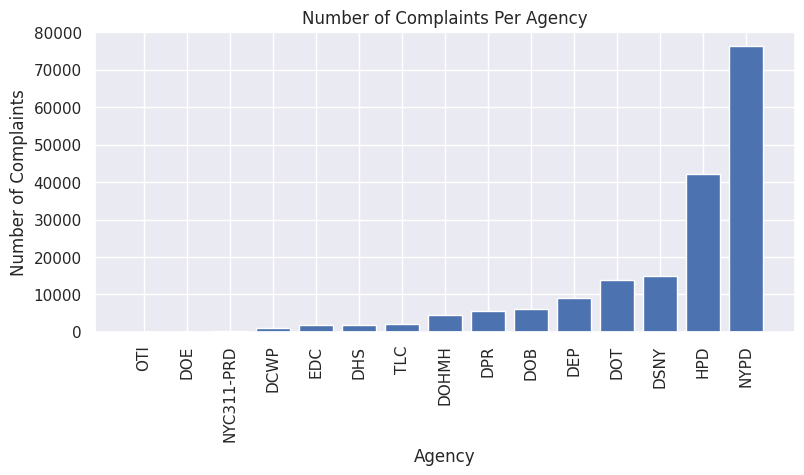

In [ ]:
Count_SSR_Agency()

In [ ]:
df.rename(columns = {'Complaint Type':'Complaint_Type'}, inplace = True)

In [ ]:
#Number of Complaints Per Complaint Type Function
def Count_SSR_ComplaintType():
    #The SQL query for the Number of Complaints Per Complaint Type
    q2 = """
         Select Complaint_Type,Count(*) as Count
         From df
         Group By Complaint_Type
         Having Count(*) > 10000
         Order By Count
         ;
         """
    #Store the output of the SQL query as a dataframe
    df2 = sqldf(q2)
    #Create a figure with the height of 3 and width of 7
    fig = plt.figure(figsize=(7,3))
    #Set the canvas dimensions for the figure
    axes = fig.add_axes([0,0,1,1])
    #Plot the bar chart based on the two attributes
    axes.bar(df2.Complaint_Type,df2.Count)
    #Set the X axis label
    axes.set_xlabel('Complaint Type')
    #Set the Y axis label
    axes.set_ylabel('Number of Complaints')
    #Rotate the X axis label to avoid overlapping labels and to show the complaint type
    plt.xticks(rotation=90)
    #Set the title of the bar chart
    axes.set_title('Number of Complaints Per Complaint Type')

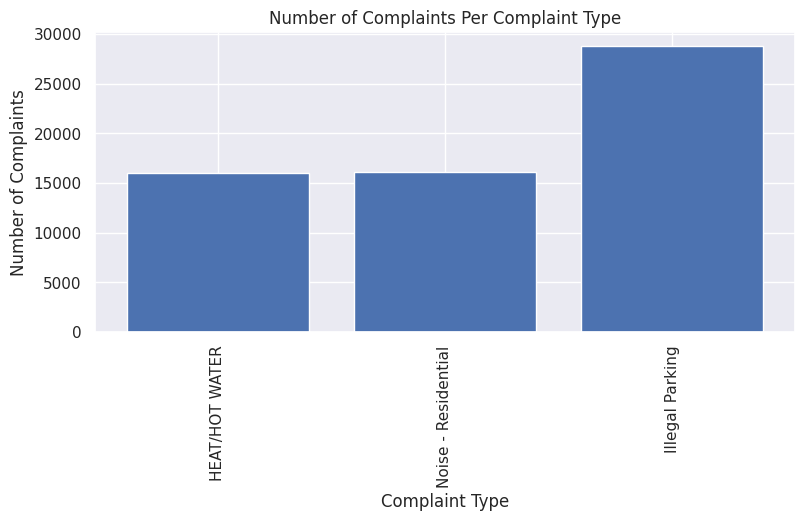

In [ ]:
Count_SSR_ComplaintType()

In [ ]:
import numpy as np
df['City'] = df['City'].replace(np.nan, 'Unknown')

In [ ]:
#Number of Complaints Per City Function
def Count_SSR_City():
    #The SQL query for the Number of Complaints Per City
    q3 = """Select City,Count(*) as Count
            From df
            Group By City
            Having Count(*) > 5000
            Order By Count"""
    #Store the output of the SQL query as a dataframe
    df3 = sqldf(q3)
    #Create a figure with the height of 3 and width of 7
    fig = plt.figure(figsize=(7,3))
    #Set the canvas dimensions for the figure
    axes = fig.add_axes([0,0,1,1])
    #Plot the bar chart based on the two attributes
    axes.bar(df3.City,df3.Count)
    #Set the X axis label
    axes.set_xlabel('City')
    #Set the Y axis label
    axes.set_ylabel('Number of Complaints')
    #Rotate the X axis label to avoid overlapping labels and to show the city
    plt.xticks(rotation=90)
    #Set the title of the bar chart
    axes.set_title('Number of Complaints Per City')

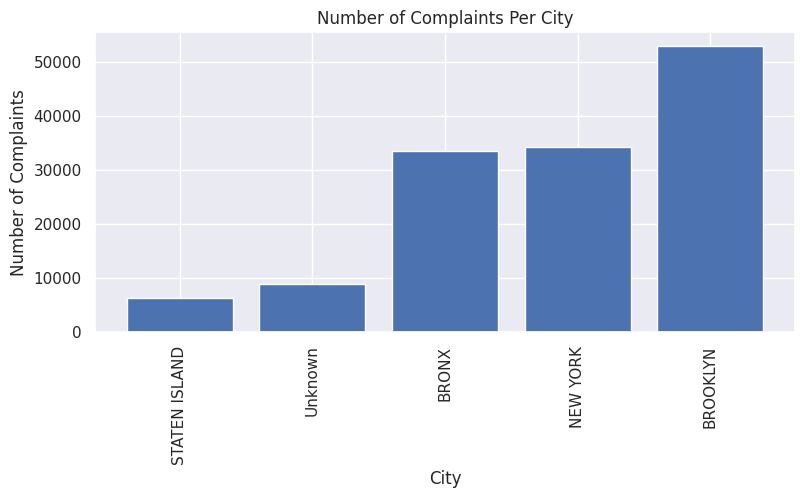

In [ ]:
Count_SSR_City()

In [ ]:
#Distribution of Complaints per Longitude and Latitude
def Long_Lat_Plot():
    #The SQL query for the Distribution of Complaints per Longitude and Latitude
    q12 = """Select Longitude,Latitude
            From df"""
    #Store the output of the SQL query as a dataframe
    df12 = sqldf(q12)
    #Create a figure with the height of 3 and width of 7
    fig = plt.figure(figsize=(7,3))
    #Set the canvas dimensions for the figure
    axes = fig.add_axes([0,0,1,1])
    #Plot the scatter chart based on the geographical location of complaints
    axes.scatter(x=df12.Longitude, y=df12.Latitude, alpha=0.3, cmap='viridis')
    #Set the X axis label
    axes.set_xlabel('Longitude')
    #Set the Y axis label
    axes.set_ylabel('Latitude')
    #Set the title of the scatter chart
    axes.set_title('Distribution of Complaints')

<ipython-input-28-1c1c17e19178>:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes.scatter(x=df12.Longitude, y=df12.Latitude, alpha=0.3, cmap='viridis')


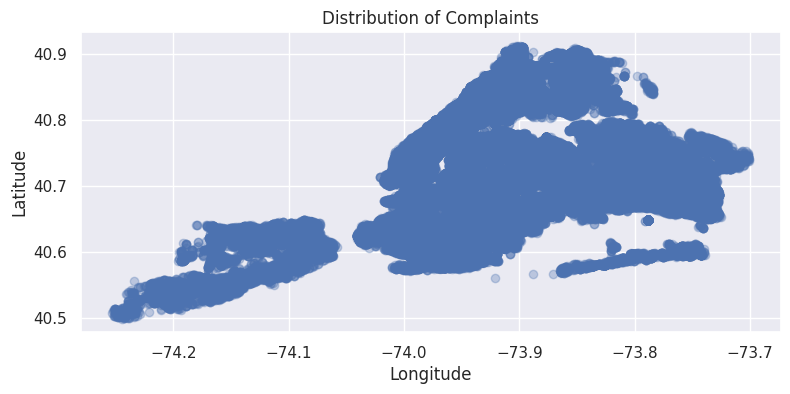

In [ ]:
Long_Lat_Plot()